In [34]:
import numpy as np
import matplotlib.pyplot as plt 
import math 
import matplotlib.ticker as mtick

In [35]:
#A python program to compute the finite key rate of COW QKD protocol
#((1-Q-delQ)*hfunc((1+delta)/2))-
#A fuction to compute the secret key fraction using leak_EC, leak_VER, QBER Q, delQ, delta,beta_smooth, beta_EC, beta_PA.
def f_sec(leak_EC, leak_VER, Q, delQ,beta_smooth, beta_EC, beta_PA):
    f_sec= 1-leak_EC-(leak_VER*(Q+delQ))-beta_smooth-beta_EC-beta_PA
    return f_sec

# A function for calulating the binary entropy
def hfunc(e):
    h=-e*np.log2(e)-((1-e)*np.log2(1-e))
    return h

# A function for calculating delQ value
def delQval(eta_PE,n_pp,epsilon_PE):
    delQval=np.sqrt((1+eta_PE*(n_pp-1))/((eta_PE*n_pp)**2)*np.log(1/epsilon_PE))
    return delQval

# A function for calculating delV value
def delVval(epsilon_PE_V, n_V):
    delVval=np.sqrt(1/2*(np.log(1/epsilon_PE_V)+2*np.log(n_V+1))/n_V)
    return delVval

# A faunction to calculate beta_smooth
def beta_smoothVal(epsilon_smooth, n_PP):
    beta_smoothVal=7*np.sqrt(np.log2(2/epsilon_smooth)/n_PP)
    return beta_smoothVal

# A function to calculate n_V
def n_Vval(n_sift,p_decoy,t_B):
    n_Vval = ((n_sift*p_decoy+((1+p_decoy)**2)/4)/(1-p_decoy))*((1-t_B)/t_B)
    return n_Vval

# A function to calculate beta_EC
def beta_ECval(epsilon_EC,n_PP):
    beta_ECval=np.log2(2/epsilon_EC)/n_PP
    return beta_ECval

# A function to calculate beta_PA
def beta_PAval(epsilon_PA,n_PP):
    beta_PAval=2*np.log2(1/epsilon_PA)/n_PP
    return beta_PAval
# A function to calculate deta
def deltaval(V,del_V,mu):
    deltaval=(2*(V-del_V)-1)*np.exp(-mu)-(2*np.sqrt(1-np.exp(-2*mu))*np.sqrt((V-del_V)*(1-(V-del_V))))
    return deltaval

    



In [55]:
leak_VER=0.23
leak_EC=1/4
eta_PE=0.1
Q=0.115


epsilon_EC=epsilon_VER=8*10**(-11)
epsilon_PE=epsilon_PE_V=7.7*10**(-11)
epsilon_smooth=4*10**(-20)
epsilon_PA=10**(-11)
delQ=delQval(eta_PE,n_pp,epsilon_PE)
n_sift=10**6
n_pp=0.90*n_sift



In [56]:


beta_smooth=beta_smoothVal(epsilon_smooth, n_pp)
beta_EC=beta_ECval(epsilon_EC,n_pp)
beta_PA=beta_PAval(epsilon_PA,n_pp)



In [57]:
c=0.9*f_sec(leak_EC, leak_VER, Q, delQ,beta_smooth, beta_EC, beta_PA)

In [58]:
c

0.5940376182184398

In [59]:
c*n_sift

594037.6182184399

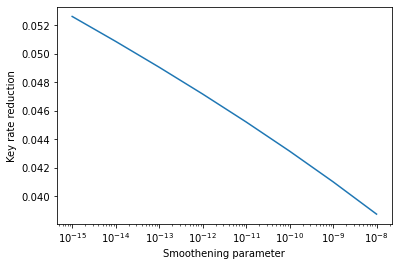

In [60]:
a=[10**(-15),10**(-14),10**(-13),10**(-12),10**(-11),10**(-10),10**(-9),10**(-8)]
b=[]
for i in range(len(a)):
    b.append(beta_smoothVal(a[i], n_pp))
plt.semilogx(a,b)
plt.xlabel("Smoothening parameter")
plt.ylabel("Key rate reduction")
plt.savefig('smoothening.png')

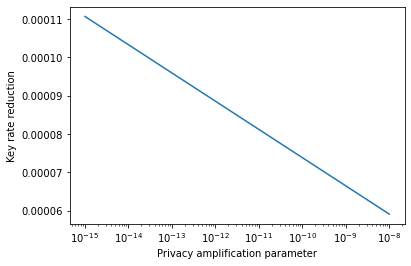

In [52]:
a=[10**(-15),10**(-14),10**(-13),10**(-12),10**(-11),10**(-10),10**(-9),10**(-8)]
b=[]
for i in range(len(a)):
    b.append(beta_PAval(a[i], n_pp))
plt.semilogx(a,b)
plt.xlabel("Privacy amplification parameter")
plt.ylabel("Key rate reduction")
plt.savefig('privacyamp.png')

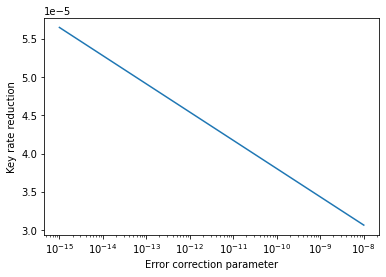

In [53]:
a=[10**(-15),10**(-14),10**(-13),10**(-12),10**(-11),10**(-10),10**(-9),10**(-8)]
b=[]
for i in range(len(a)):
    b.append(beta_ECval(a[i], n_pp))
plt.semilogx(a,b)
plt.xlabel("Error correction parameter")
plt.ylabel("Key rate reduction")
plt.savefig('errorcorrec.png')

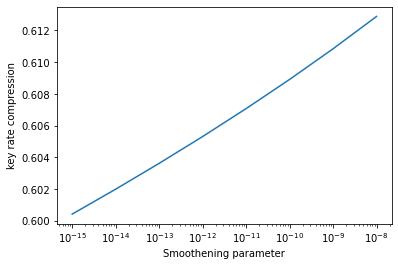

In [54]:
a=[10**(-15),10**(-14),10**(-13),10**(-12),10**(-11),10**(-10),10**(-9),10**(-8)]
b=[]
for i in range(len(a)):
    b.append(0.9*f_sec(leak_EC, leak_VER, Q, delQ,beta_smoothVal(a[i], n_pp), beta_EC, beta_PA))
plt.semilogx(a,b)
plt.ylabel("key rate compression")
plt.xlabel("Smoothening parameter")
plt.savefig("Keyreduction")

In [33]:
b

[0.3131155944999669,
 0.32346688343991065,
 0.3341868631286804,
 0.3453179823547422,
 0.3569115202078997,
 0.36903039402973975,
 0.38175323167377856,
 0.3951804823900725]